In [115]:
# Import libraries

import numpy as np
from scipy.special import hermite, factorial
import matplotlib.pyplot as plt


In [ ]:
# import parameter from config file

import yaml

with open("../config.yml", "r") as file:
    config = yaml.safe_load(file)
    planck_const = config["params"]["hbar"]
    quantum_state = config["params"]["quantum_state"]

In [117]:
# set the limit for the x
X = np.linspace(-5, 5, 1000)

In [118]:
def get_wavefunction(n, X):
    """
    Wavefunction for the nth quantum state in dimensionless units.

    params:
        n: Order of polynomial
        X: Position variable
    
    Returns:
        Wavefunction (psi)
    """
    hn = hermite(n) # Hermite polynomial
    normalization = 1 / (np.sqrt(2**n*factorial(n)*np.pi**0.25))
    return normalization * hn(X) * np.exp(-X**2/2)

In [119]:
# Probability density
def probability_density(psi):
    """
    Computes the probability density.

    Params:
    psi: Wavefunction

    Returns:
    Probability density
    """

    return psi**2

In [120]:
# Harmonic potential V(x)
def potential(x, n):
    """
    Computes the harmonic potential for given position x and the energy states n.

    Params:
        x: Numpy array representing the position variable
        n: Quantum state
    
    Return:
        Harmonic potential for quantum state n.
    """
    V = 0.5 * x**2 # Dimensionless units
    E_n = (n + 0.5)
    return np.where(V <= E_n, V, np.nan)

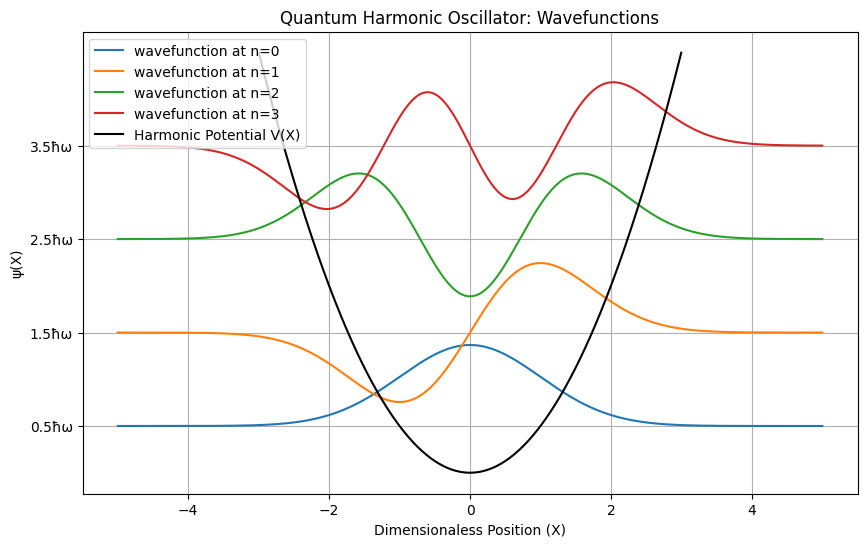

In [121]:
# plot the wavefunctions for given quantum state

plt.figure(figsize=(10, 6))

for i in range(quantum_state):
    psi_n = get_wavefunction(i, X)

    plt.plot(X, psi_n + i + 0.5, label=f"wavefunction at n={i}")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Custom y-ticks according to the energy units (h-omega)
yticks = [(n + 0.5) for n in range(quantum_state)]
plt.yticks(yticks, [f'{n+0.5}ħω' for n in range(quantum_state)])

# Plot the potential
plt.plot(X, potential(X, quantum_state), color='black', label='Harmonic Potential V(X)')

plt.title("Quantum Harmonic Oscillator: Wavefunctions")
plt.xlabel("Dimensionaless Position (X)")
plt.ylabel("ψ(X)")
plt.legend()
plt.grid()
plt.show()

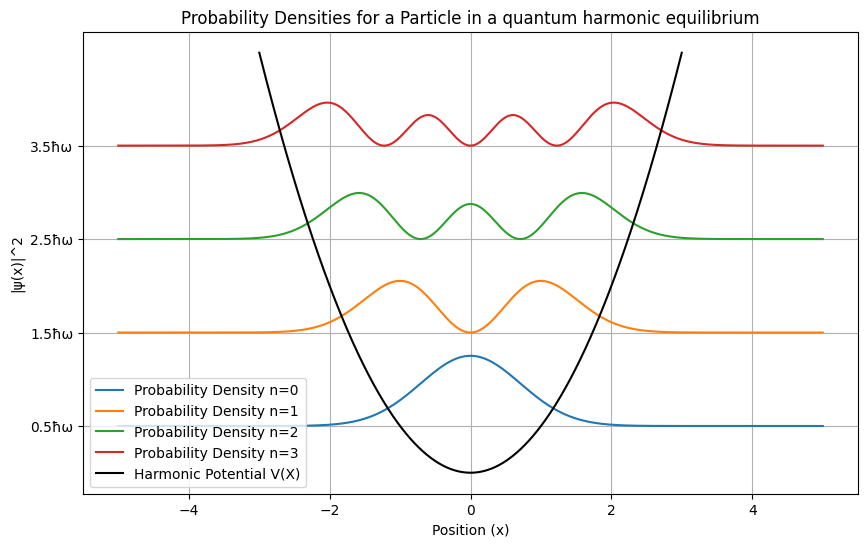

In [122]:
# plot the probability density for given quantum state

plt.figure(figsize=(10, 6))

for n in range(quantum_state):
    psi_n = get_wavefunction(n, X)
    prob_density = probability_density(psi_n)
    
    plt.plot(X, prob_density+ n + 0.5, label=f"Probability Density n={n}")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Custom y-ticks according to the energy units (h-omega)
yticks = [(n + 0.5) for n in range(quantum_state)]
plt.yticks(yticks, [f'{n+0.5}ħω' for n in range(quantum_state)])

# Plot the potential
plt.plot(X, potential(X, quantum_state), color='black', label='Harmonic Potential V(X)')

plt.title("Probability Densities for a Particle in a quantum harmonic equilibrium")
plt.xlabel("Position (x)")
plt.ylabel("|ψ(x)|^2")
plt.legend()
plt.grid()
plt.show()